
### LINEAR REGRESSION 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
INFOSYS=pd.read_csv("INFY.NS.csv")
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


In [7]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6501 entries, 0 to 6500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6501 non-null   object 
 1   Open       6487 non-null   float64
 2   High       6487 non-null   float64
 3   Low        6487 non-null   float64
 4   Close      6487 non-null   float64
 5   Adj Close  6487 non-null   float64
 6   Volume     6487 non-null   float64
dtypes: float64(6), object(1)
memory usage: 355.6+ KB


In [8]:
INFOSYS.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6496,False,False,False,False,False,False,False
6497,False,False,False,False,False,False,False
6498,False,False,False,False,False,False,False
6499,False,False,False,False,False,False,False


In [9]:
INFOSYS.isnull().sum()

Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [10]:
INFOSYS.isnull().sum().sum()

84

In [11]:
INFOSYS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
np.unique(INFOSYS["Date"])

array(['1996-01-01', '1996-01-02', '1996-01-03', ..., '2021-10-14',
       '2021-10-18', '2021-10-19'], dtype=object)

In [13]:
np.unique(INFOSYS["Open"])

array([7.63183e-01, 7.65625e-01, 7.67578e-01, ..., 1.76875e+03,
       1.81400e+03,         nan])

In [14]:
np.unique(INFOSYS["High"])

array([7.65625e-01, 7.67578e-01, 7.70507e-01, ..., 1.79900e+03,
       1.83450e+03,         nan])

In [15]:
np.unique(INFOSYS["Low"])

array([7.12890000e-01, 7.52929000e-01, 7.63183000e-01, ...,
       1.75244995e+03, 1.78230005e+03,            nan])

In [16]:
np.unique(INFOSYS["Close"])

array([7.63183000e-01, 7.67578000e-01, 7.68554000e-01, ...,
       1.79215002e+03, 1.82215002e+03,            nan])

In [17]:
np.unique(INFOSYS["Adj Close"])

array([5.26380000e-01, 5.29411000e-01, 5.30084000e-01, ...,
       1.79215002e+03, 1.82215002e+03,            nan])

In [18]:
np.unique(INFOSYS["Volume"])

array([0.00000000e+00, 5.12000000e+04, 1.02400000e+05, ...,
       2.11021376e+08, 2.76615040e+08,            nan])

In [19]:
INFOSYS["Date"].value_counts()

1996-01-01    1
2013-01-02    1
2013-01-16    1
2013-01-15    1
2013-01-14    1
             ..
2004-04-16    1
2004-04-15    1
2004-04-14    1
2004-04-13    1
2021-10-19    1
Name: Date, Length: 6501, dtype: int64

In [20]:
INFOSYS["Open"].value_counts()

1.367187       10
243.750000      9
465.000000      8
206.250000      8
250.000000      8
               ..
83.432816       1
83.052345       1
78.359375       1
79.685936       1
1814.000000     1
Name: Open, Length: 5164, dtype: int64

In [21]:
INFOSYS["High"].value_counts()

1.367187       11
0.937500       10
1.308593       10
1.328125        8
1.347656        7
               ..
111.234375      1
111.550003      1
112.156250      1
111.543747      1
1834.500000     1
Name: High, Length: 5570, dtype: int64

In [22]:
INFOSYS["Low"].value_counts()

1.308593       8
58.593750      7
580.000000     6
59.375000      6
1.347656       6
              ..
165.937500     1
164.443756     1
165.753128     1
162.628128     1
1782.300049    1
Name: Low, Length: 5773, dtype: int64

In [23]:
INFOSYS["Close"].value_counts()

0.937500       7
6.241992       6
1.376953       4
1.386718       4
1.347656       4
              ..
124.231247     1
122.559372     1
119.412498     1
121.628128     1
1822.150024    1
Name: Close, Length: 6173, dtype: int64

In [24]:
INFOSYS["Adj Close"].value_counts()

0.646609       7
4.351205       6
14.660735      4
0.961794       4
0.908963       3
              ..
93.196259      1
93.004158      1
93.406639      1
92.912712      1
1822.150024    1
Name: Adj Close, Length: 6285, dtype: int64

In [25]:
INFOSYS["Volume"].value_counts()

0.0           120
307200.0       20
153600.0       17
256000.0       16
460800.0       14
             ... 
9939280.0       1
13589840.0      1
13787296.0      1
12896112.0      1
10324260.0      1
Name: Volume, Length: 6015, dtype: int64

In [26]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6.487000e+03
mean,315.959501,319.722653,312.134399,315.928990,275.373725,1.529716e+07
std,317.395127,320.568211,314.366051,317.494593,311.783465,1.616161e+07
min,0.763183,0.765625,0.712890,0.763183,0.526380,0.000000e+00
25%,69.492970,70.921875,68.063671,69.482033,49.189633,6.036795e+06
50%,237.500000,241.587494,233.206253,238.268753,179.381546,9.594120e+06
75%,473.500000,479.237503,470.049988,474.728119,414.672867,1.821839e+07
max,1814.000000,1834.500000,1782.300049,1822.150024,1822.150024,2.766150e+08


In [27]:
INFOSYS_NEW=INFOSYS.dropna(axis = 0)
INFOSYS_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


In [28]:
INFOSYS_NEW.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

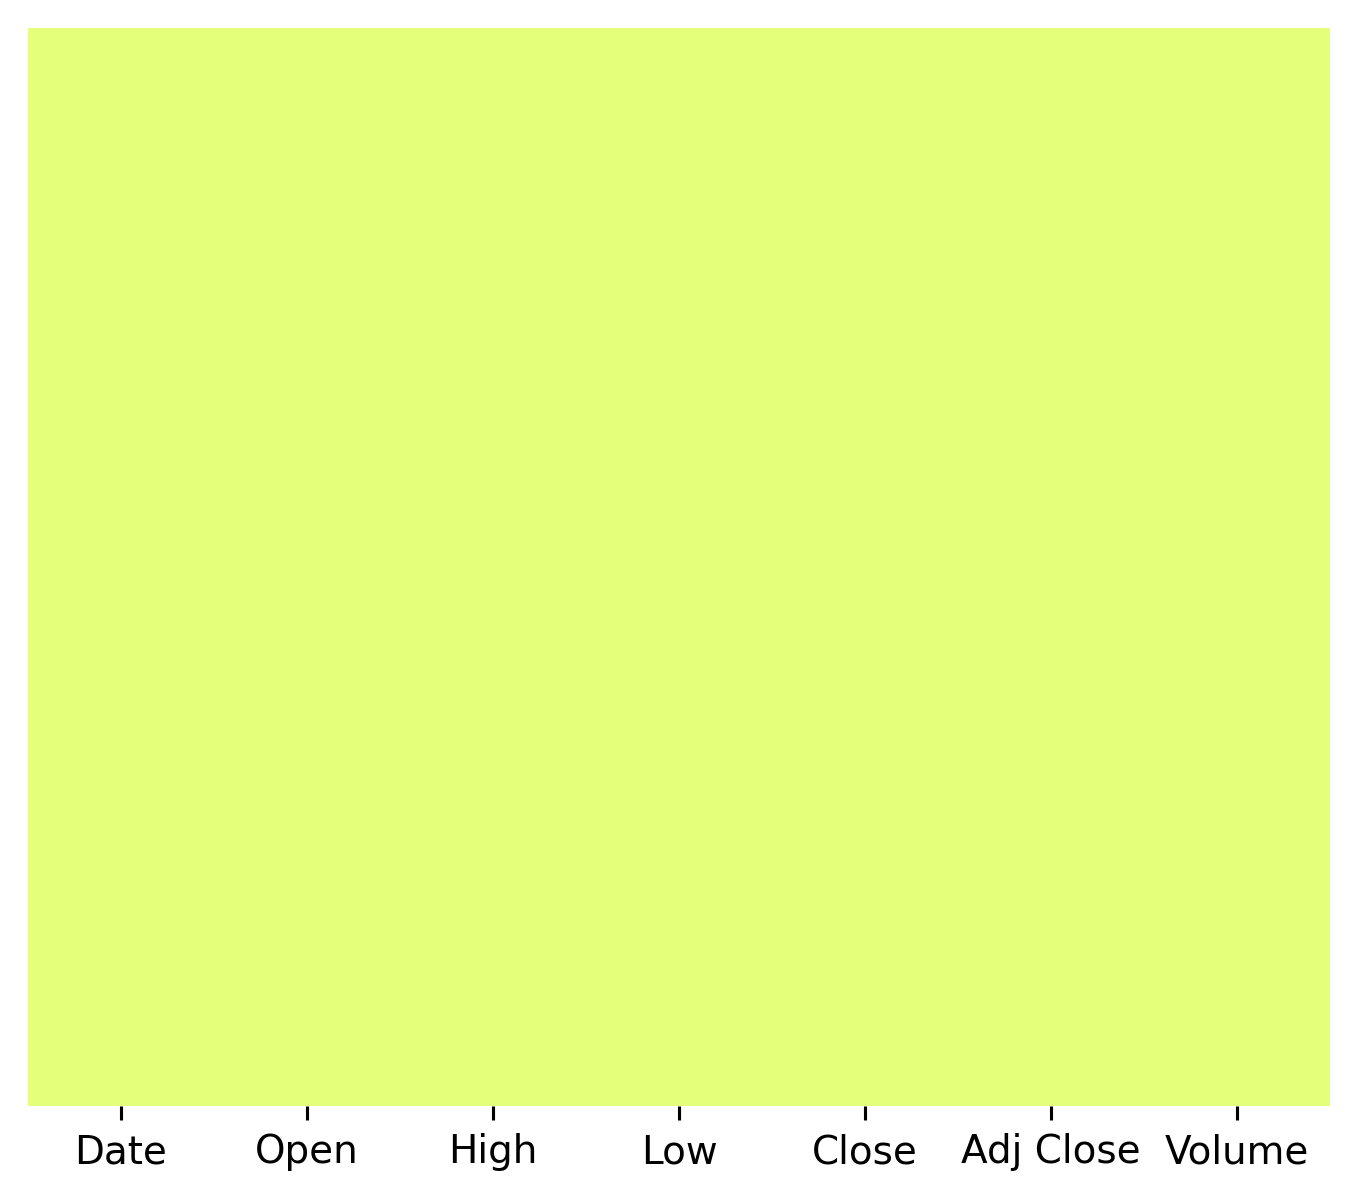

In [29]:
fig=plt.figure(figsize=(6,5),dpi=280)
sns.heatmap(INFOSYS_NEW.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
plt.show()

### Hence, There is no missing values.

In [30]:
INFOSYS_NEW.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6.487000e+03
mean,315.959501,319.722653,312.134399,315.928990,275.373725,1.529716e+07
std,317.395127,320.568211,314.366051,317.494593,311.783465,1.616161e+07
min,0.763183,0.765625,0.712890,0.763183,0.526380,0.000000e+00
25%,69.492970,70.921875,68.063671,69.482033,49.189633,6.036795e+06
50%,237.500000,241.587494,233.206253,238.268753,179.381546,9.594120e+06
75%,473.500000,479.237503,470.049988,474.728119,414.672867,1.821839e+07
max,1814.000000,1834.500000,1782.300049,1822.150024,1822.150024,2.766150e+08


In [31]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6487 entries, 0 to 6500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6487 non-null   object 
 1   Open       6487 non-null   float64
 2   High       6487 non-null   float64
 3   Low        6487 non-null   float64
 4   Close      6487 non-null   float64
 5   Adj Close  6487 non-null   float64
 6   Volume     6487 non-null   float64
dtypes: float64(6), object(1)
memory usage: 405.4+ KB


In [32]:
INFOSYS_NEW['Date']=pd.to_datetime(INFOSYS_NEW['Date'])

In [33]:
print(f'DataFrame contains Stock Prices between {INFOSYS_NEW.Date.min()} {INFOSYS_NEW.Date.max()}')
print(f'Total Days = {(INFOSYS_NEW.Date.max()- INFOSYS_NEW.Date.min()).days} days')

DataFrame contains Stock Prices between 1996-01-01 00:00:00 2021-10-19 00:00:00
Total Days = 9423 days


<AxesSubplot:>

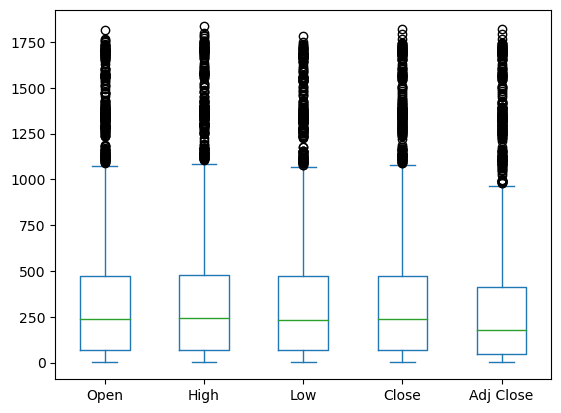

In [34]:
INFOSYS_NEW[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [35]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS_NEW['Date'], 'y':INFOSYS_NEW['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [36]:
iplot(plot)

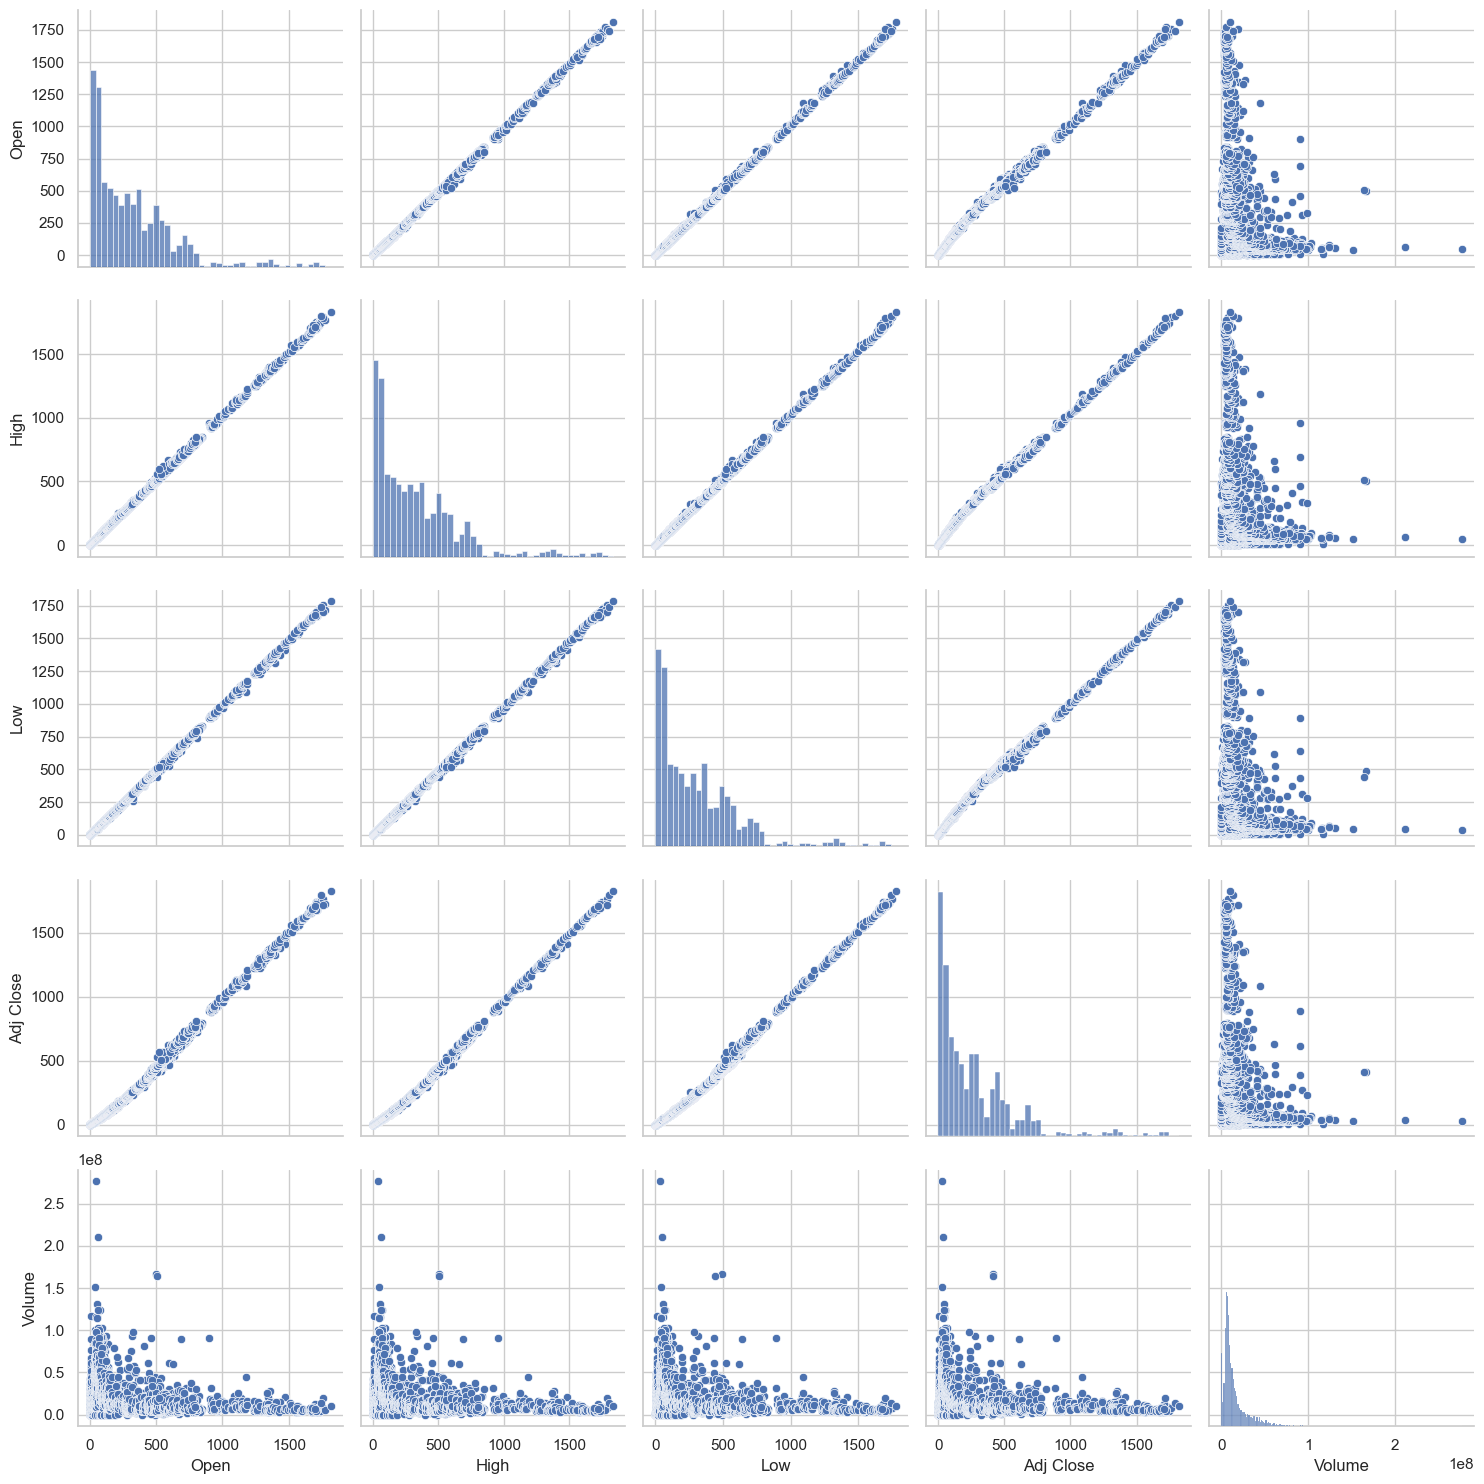

In [37]:
#fig=plt.figure(figsize=(2,2))
sns.set(style='whitegrid',context='notebook')
cols=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
sns.pairplot(INFOSYS_NEW[cols],size=3)
plt.tight_layout()
plt.show()

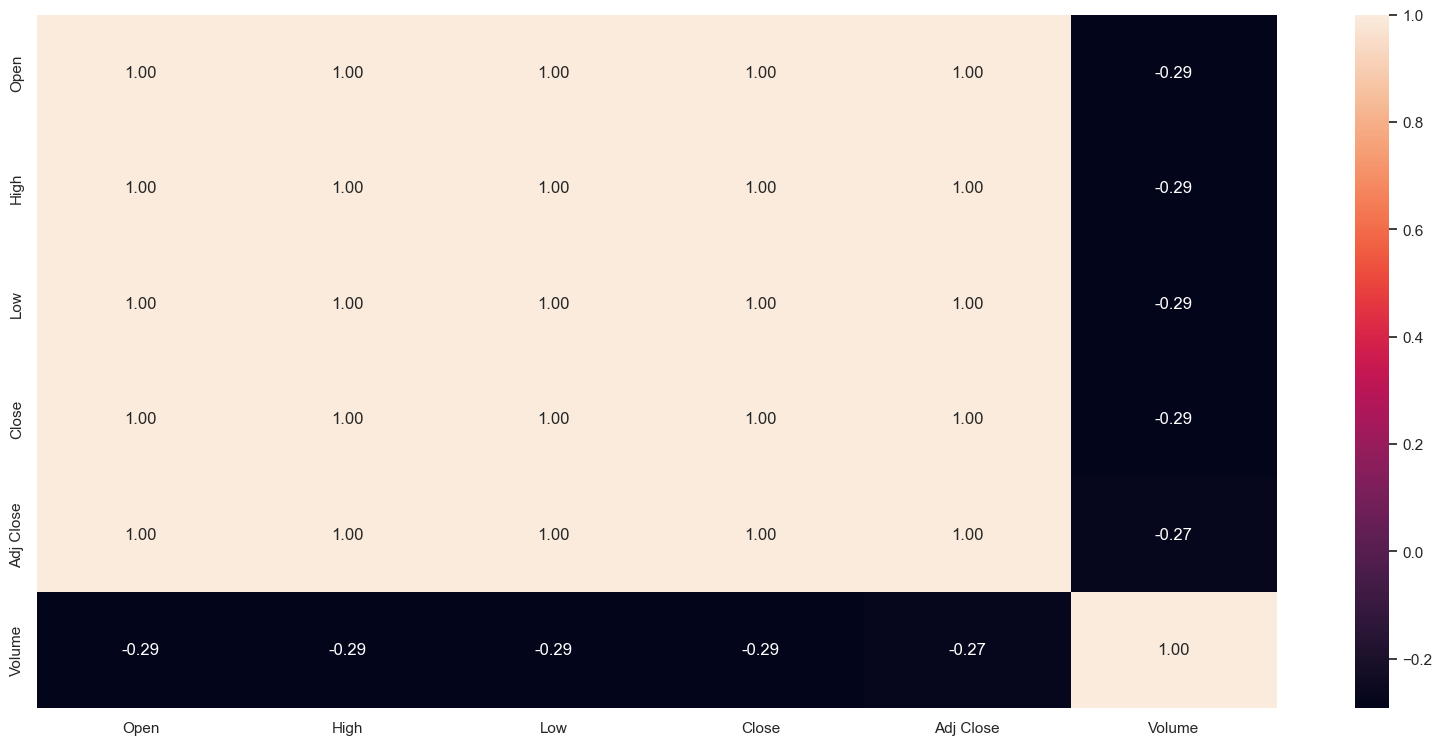

In [38]:
import seaborn as sns
corr = INFOSYS_NEW.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')


In [39]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [40]:
X= np.array(INFOSYS_NEW.index).reshape(-1,1)
Y= INFOSYS_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)


In [41]:
scaler = StandardScaler().fit(X_train)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [44]:
Model.score(X_train, Y_train)

0.749047815699736

In [45]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = Model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

INFOSYS_DATA = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=INFOSYS_DATA, layout=layout)

In [46]:
iplot(plot2)

In [47]:
Accuracy_With_LiearRegression = Model.score(X_train, Y_train)
Accuracy_With_LiearRegression

0.749047815699736

In [48]:
scores = f''' 
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, Model.predict(X_train))}\t{r2_score(Y_test, Model.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, Model.predict(X_train))}\t{mse(Y_test, Model.predict(X_test))}
'''

print(scores)

 
Metric           Train                Test        
r2_score  0.749047815699736	0.7535922186759979
MSE       25809.07997887765	23638.125640079106



In [49]:
print(f'Accucary of INFOSYS STOCK MARKETING using Linear Regression is', Accuracy_With_LiearRegression)

Accucary of INFOSYS STOCK MARKETING using Linear Regression is 0.749047815699736


In [50]:
x = INFOSYS_NEW[['Open', 'High', 'Low', 'Adj Close']].values
y = INFOSYS_NEW[["Close"]].values

In [51]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [52]:
def polynomialRegression(degree):
    
    x= np.array(INFOSYS_NEW.index).reshape(-1,1)
    y= INFOSYS_NEW['Close']


    
    quadratic_featurizer = PolynomialFeatures(degree)
    x_quadratic = quadratic_featurizer.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x_quadratic,y,test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(x_train, y_train)
    
    print('Residual sum of squares train: %.2f' % np.mean((regressor_quadratic.predict(x_train)- y_train) ** 2))
    print('Residual sum of squares test: %.2f' % np.mean((regressor_quadratic.predict(x_test)- y_test) ** 2))

In [53]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [54]:
i = interact(polynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…